### 1. Analisis Descriptivos
---

#### 1.1 Resumen Dataset
- Tenemos 12 columnas y 8523 filas.
- Tenemos valores nulos en la columna 'Item_Weight'. Espramos reemplazarlos con el promedio de 'Item_Weight' por 'item_fat_content' y 'item_type'.
- Tenemos valores nulos en la columna 'Outlet_Size'. Al ser una columna categorica, veremos que otras variables podemos usar.
- Solo tenemos 3 tiendas sin 'Outlet_Size', pero son mas filas porque se repite por su cantidad de productos.
- Tenemos Item_Fat_Content con labels repetidos y erroneos que hay que aunar. Deajaremos solo dos valores en esta columna, 'Regular' y 'Low Fat'.
- Tenemos atributos de productos y locales en el dataset, ademas de la venta final por producto y local (Item_Outlet_Sales).

In [384]:
# Importamo librerias a usar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [385]:
# Leemos el archivo CSV que contiene la data:
file = r'C:/Users/Juan.Paredes/Unilever/Data & Analytics CL DEV - General/Nacho/1. Visual Studio Scripts/CURSO DOJO/6. Ejercicio Prediccion Ventas (Parte 2)/sales_predictions (1).csv'
df = pd.read_csv(file)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### 1.2 Analisis Estadistico Descriptivo
---
- Tenemos records con Item_Visibility en 0, esto diria que no tienen visibilidad en la tienda, debemos revisar si es un error que debemos arreglar.
- La base contiene 1559 productos diferentes en su catalogo que son vendidos en 10 tiendas/outlers.
- El peso promedio de los productos es de 12.8 KG.
- El precio promedio de los productos es de $ 140.99.
- La venta promedio por sala/producto es de $ 2181.28.
- Vemos que la variable que tiene mayor correlacion con la venta es Item_MRP que es el precio del producto.
- La tienda con mayor venta es la **OUT027**.

In [387]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [388]:
# Revisamos si hay correlacion entre las variables 
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Juan.Paredes\AppData\Local\Temp\ipykernel_2116\2147982438.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.03,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.03,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


Text(0.5, 1.0, 'A Histogram of Item_Outlet_Sales')

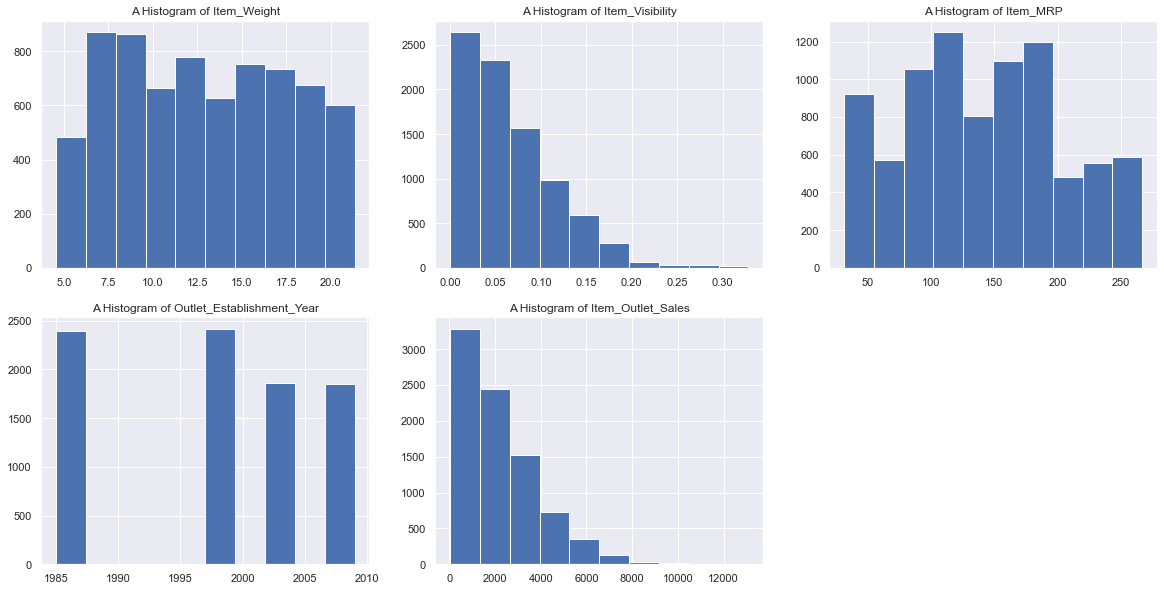

In [389]:
# Revisamos Histogramas de las variables

plt.subplots(figsize=(20, 10))

# #create legend
# handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [low,medium, high]]
# labels= ["low","medium", "high"]
# plt.legend(handles, labels)


### Primer Histograma
plt.subplot(2,3,1)
plt.hist(df['Item_Weight'])
plt.title('A Histogram of Item_Weight')

### Segundo Histograma
plt.subplot(2,3,2)
plt.hist(df['Item_Visibility'])
plt.title('A Histogram of Item_Visibility')

### Tercer Histograma
plt.subplot(2,3,3)
plt.hist(df['Item_MRP'])
plt.title('A Histogram of Item_MRP')

### Cuarto Histograma
plt.subplot(2,3,4)
plt.hist(df['Outlet_Establishment_Year'])
plt.title('A Histogram of Outlet_Establishment_Year')

### Quinto Histograma
plt.subplot(2,3,5)
plt.hist(df['Item_Outlet_Sales'])
plt.title('A Histogram of Item_Outlet_Sales')

In [390]:
# Revisamos cuantos productos y locales unicos tenemos:

n_items = df['Item_Identifier'].nunique()
n_outlets = df['Outlet_Identifier'].nunique()

print('La base sales tiene ' + str(n_items) + ' productos en su catalogo, atendiendo en '+ str(n_outlets) +' tiendas/outlers.')

La base sales tiene 1559 productos en su catalogo, atendiendo en 10 tiendas/outlers.


[Text(0, 0, '188340'),
 Text(0, 0, '2.14266e+06'),
 Text(0, 0, '2.16747e+06'),
 Text(0, 0, '1.85182e+06'),
 Text(0, 0, '179694'),
 Text(0, 0, '3.45393e+06'),
 Text(0, 0, '2.26812e+06'),
 Text(0, 0, '2.03673e+06'),
 Text(0, 0, '2.1184e+06'),
 Text(0, 0, '2.18397e+06')]

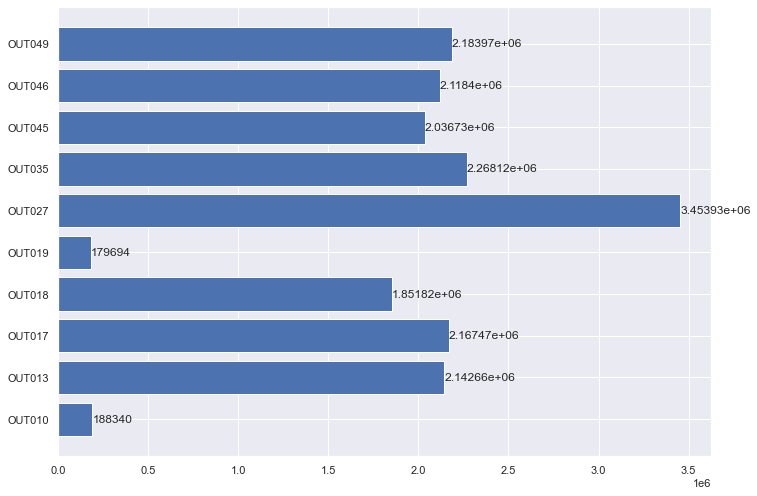

In [391]:
# Revisamos cuales son los locales con mayor venta
df_stores = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().reset_index()

fig, ax = plt.subplots()
bars = ax.barh(df_stores['Outlet_Identifier'], df_stores['Item_Outlet_Sales'])
ax.bar_label(bars)

[Text(0, 0, '5089'),
 Text(0, 0, '2889'),
 Text(0, 0, '112'),
 Text(0, 0, '316'),
 Text(0, 0, '117')]

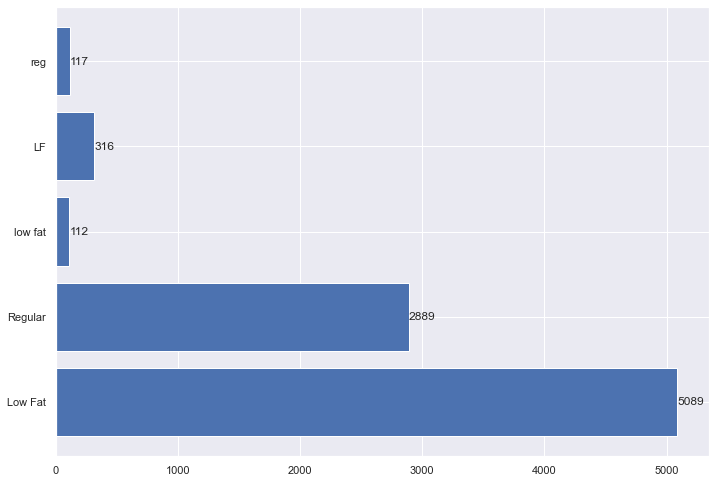

In [392]:
# Revisamos la columna Item_Fat_Content
item = df['Item_Fat_Content'].unique()
lista = []

for i in item:
    x = (df['Item_Identifier'].loc[df['Item_Fat_Content'] == i]).count()
    lista.append(x)

x = item
y = lista

fig, ax = plt.subplots()
bars = ax.barh(x, y)
ax.bar_label(bars)

[Text(0, 0, '932'), Text(0, 0, '2793'), Text(0, 0, '2410'), Text(0, 0, '2388')]

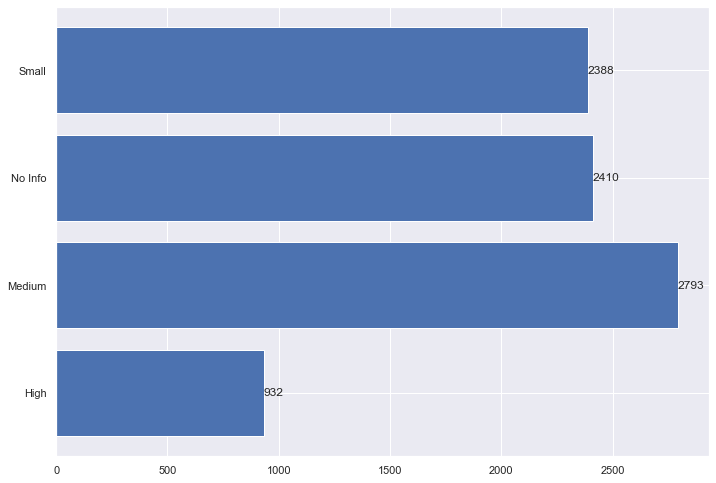

In [393]:
# Revisamos Outlet Type
df_size = df
df_size['Outlet_Size'].fillna('No Info',inplace=True)
df_size = df.groupby('Outlet_Size')['Outlet_Type'].count().reset_index()
df_size


x = df_size['Outlet_Size']
y = df_size['Outlet_Type']

fig, ax = plt.subplots()
bars = ax.barh(x, y)

ax.bar_label(bars)

[Text(0, 0, '1'), Text(0, 0, '3'), Text(0, 0, '3'), Text(0, 0, '3')]

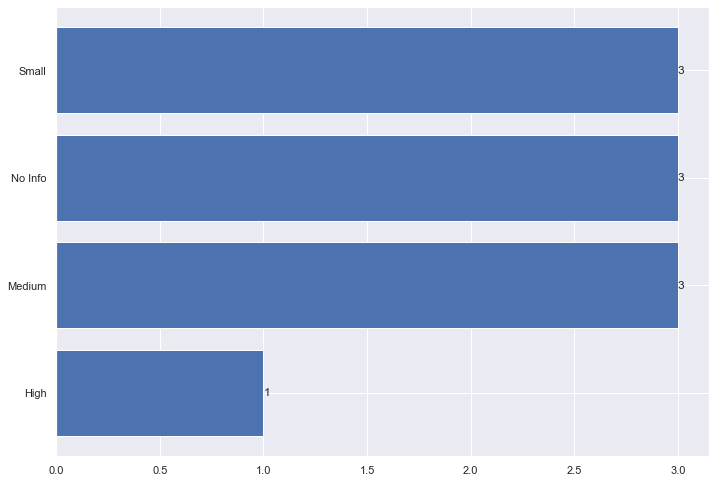

In [394]:
# Revisamos Outlet Type
df_size = df
df_size['Outlet_Size'].fillna('No Info',inplace=True)
df_size = df.groupby('Outlet_Size')['Outlet_Identifier'].nunique().reset_index()
df_size


x = df_size['Outlet_Size']
y = df_size['Outlet_Identifier']

fig, ax = plt.subplots()
bars = ax.barh(x, y)

ax.bar_label(bars)

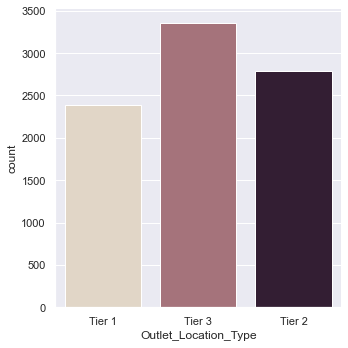

In [395]:
# Revisamos Outlet_Location

sns.catplot(x="Outlet_Location_Type", kind="count", palette="ch:.25", data=df)

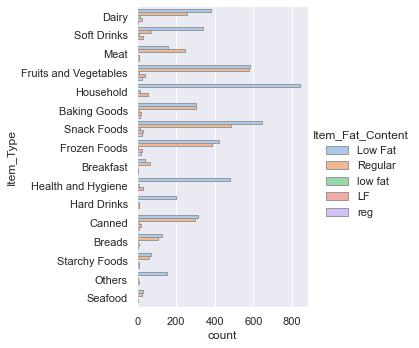

In [396]:
sns.catplot(y="Item_Type", hue="Item_Fat_Content", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

In [397]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,No Info,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,No Info,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### 2. Transformaciones y Tratamiento de Nulos
---

#### 2.0 Correccion Datos Erroneos **(Item_Fat_Content)**

[Text(0, 0, '5517'), Text(0, 0, '3006')]

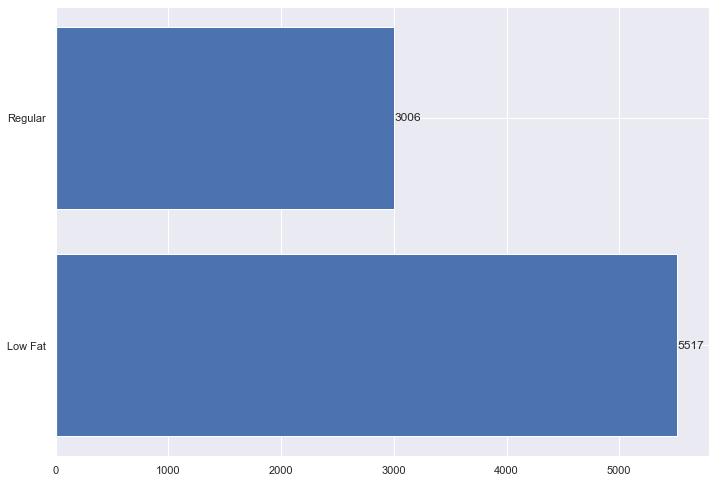

In [398]:
# Creamos un diccionario para remapear los nombres mal escritos de Fat Content para poder hacer un dataframe.

dic = {'LF': 'Low Fat','low fat':'Low Fat' , 'reg':'Regular'}

# Hacmeos el reemplazo:
df.replace({"Item_Fat_Content": dic},inplace=True)

#Revisamos la columna:
df['Item_Fat_Content'].unique()


############################
# Visualizamos despues de la transformacion con el diccionario:

item = df['Item_Fat_Content'].unique()
lista = []

for i in item:
    x = (df['Item_Identifier'].loc[df['Item_Fat_Content'] == i]).count()
    lista.append(x)

x = item
y = lista

fig, ax = plt.subplots()
bars = ax.barh(x, y)

ax.bar_label(bars)

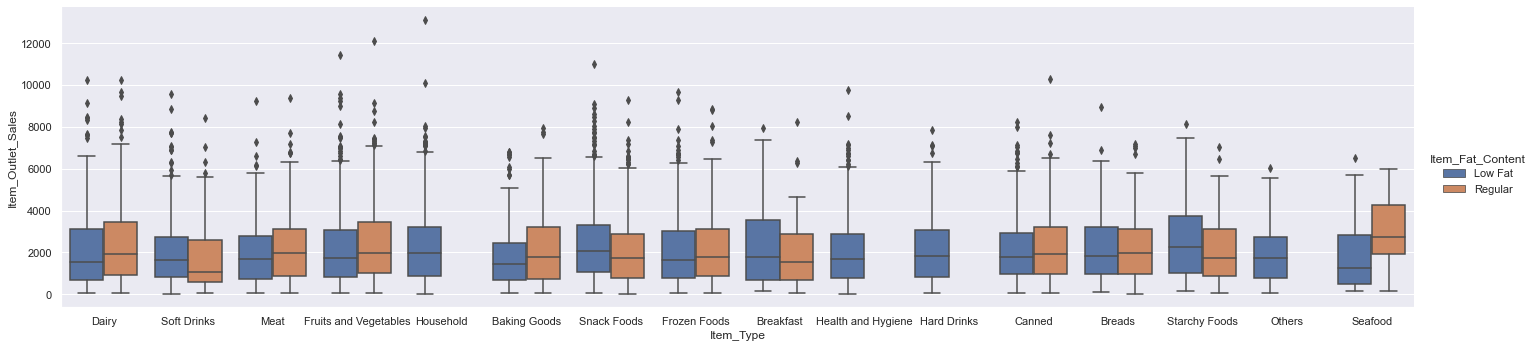

In [399]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot(x="Item_Type", y="Item_Outlet_Sales", hue="Item_Fat_Content", kind="box", data=df ,aspect= 4 )

#### 2.1 Tratamiento Nulos **(Item_Weight)**

In [400]:
# Creamos un dataframe con Item_Weight promedios por Item_Type y Item_Fat_Content
df_weight = df[['Item_Weight','Item_Fat_Content','Item_Type']].groupby(['Item_Type','Item_Fat_Content']).mean().reset_index()
df_weight = df_weight.rename(columns={'Item_Weight':'Item_Weight_Promedio'})
df_weight.head()


# Hacemos un merge con el datframe original
df= df.merge(df_weight, how='left', left_on=['Item_Fat_Content','Item_Type'], right_on=['Item_Fat_Content','Item_Type'])

# Rellenamos los NAN con la columna de Item_Weight_Promedio
df['Item_Weight'].fillna(df['Item_Weight_Promedio'], inplace=True)

# Borramos columas usadas
df.drop(columns='Item_Weight_Promedio', inplace=True)

#Revisamos salida
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,No Info,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### 2.2 Tratamiento Nulos **(Outlet_Size)**

In [401]:
df_stores = df.groupby(['Outlet_Location_Type','Outlet_Identifier','Outlet_Size']).agg(
    total_items = pd.NamedAgg(column="Item_Identifier", aggfunc="count"),
    total_item_types = pd.NamedAgg(column="Item_Type", aggfunc="nunique"),
    total_visibility = pd.NamedAgg(column="Item_Visibility", aggfunc="sum"),
    total_sales = pd.NamedAgg(column="Item_Outlet_Sales", aggfunc="sum"),
    total_wight = pd.NamedAgg(column="Item_Weight", aggfunc="sum")
    ).reset_index()

df_stores

,Outlet_Location_Type,Outlet_Identifier,Outlet_Size,total_items,total_item_types,total_visibility,total_sales,total_wight
0,Tier 1,OUT019,Small,528,16,57.257041,1.796941e+05,6807.652646
1,Tier 1,OUT046,Small,930,16,56.231875,2.118395e+06,11966.125000
2,Tier 1,OUT049,Medium,930,16,56.549156,2.183970e+06,12013.225000
3,Tier 2,OUT017,No Info,926,16,56.834646,2.167465e+06,11877.495000
4,Tier 2,OUT035,Small,930,16,56.974873,2.268123e+06,11931.295000
5,Tier 2,OUT045,No Info,929,16,56.180780,2.036725e+06,11751.840000
6,Tier 3,OUT010,No Info,555,16,56.308832,1.883402e+05,7166.800000
7,Tier 3,OUT013,High,932,16,55.879859,2.142664e+06,12121.730000
8,Tier 3,OUT018,Medium,928,16,56.621454,1.851823e+06,11946.465000
9,Tier 3,OUT027,Medium,935,16,54.804764,3.453926e+06,12029.187679


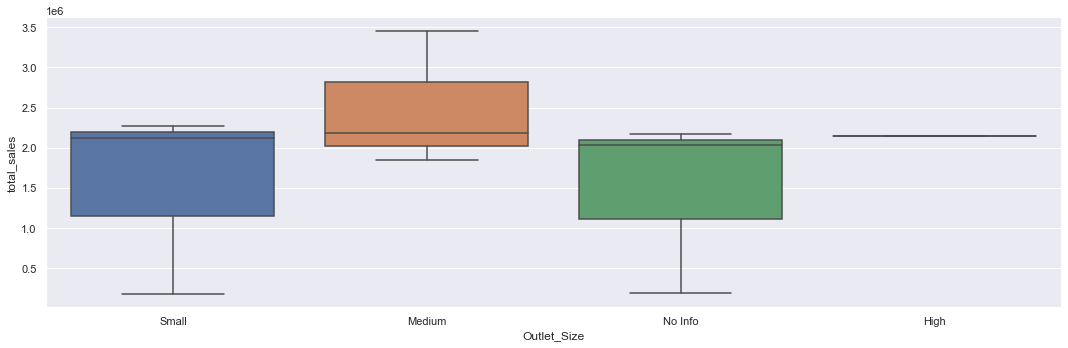

In [402]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot(x="Outlet_Size", y="total_sales", kind="box", data=df_stores ,aspect= 3 )

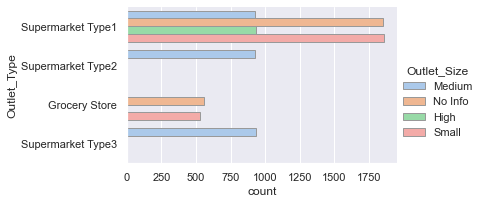

In [403]:
# Revisamos los otras categorias relacionadas a Outlet_Size, para ver si podemos crear una regla de reemplazo.
sns.catplot(y="Outlet_Type",hue="Outlet_Size", kind="count",
            palette="pastel", edgecolor=".6",
            data=df, aspect= 2, height=3)

##### Reemplazo Outlet_Size
- Las 3 tiendas que no tienen informacion de outlet_size, solo una de ellas podriamos decir que es "Small", dada su baja venta y numero de productos catalogados.
- Para las otras dos tiendas, no tenemos como diferenciar si son "Medium" o "High", dado esto las dejaremos como "Medium" ya que es la moda.

In [404]:
# Creaoms un datframe solo con los outlet sin informacion de size:
df_stores = df_stores[df_stores['Outlet_Size'] == 'No Info']

# En este datframe creamos una nueva columna con la regla de negocios:
df_stores['new_size'] = np.where(df_stores['total_items']  < 900 , 'Small', 'Medium')

#Revisamos
df_stores

C:\Users\Juan.Paredes\AppData\Local\Temp\ipykernel_2116\3311615320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stores['new_size'] = np.where(df_stores['total_items']  < 900 , 'Small', 'Medium')


,Outlet_Location_Type,Outlet_Identifier,Outlet_Size,total_items,total_item_types,total_visibility,total_sales,total_wight,new_size
3,Tier 2,OUT017,No Info,926,16,56.834646,2.167465e+06,11877.495,Medium
5,Tier 2,OUT045,No Info,929,16,56.180780,2.036725e+06,11751.840,Medium
6,Tier 3,OUT010,No Info,555,16,56.308832,1.883402e+05,7166.800,Small


In [406]:
# Traemos los nuevos Outlet_Sizes al datframe original con merge:
df = df.merge(df_stores[['Outlet_Identifier','new_size']], how = 'left' , on = 'Outlet_Identifier')

#Realizamos el reemplazo donde los outlet_size son "No Info":
df['Outlet_Size'] = np.where(df['Outlet_Size']  == 'No Info' , df['new_size'], df['Outlet_Size'])

#Revisamos
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_size
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,NaN
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,NaN
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,NaN
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,No Info,Tier 3,Grocery Store,732.3800,Small
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,NaN
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,No Info,Tier 2,Supermarket Type1,549.2850,Medium
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,NaN
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,NaN


[Text(0, 0, '1'), Text(0, 0, '5'), Text(0, 0, '4')]

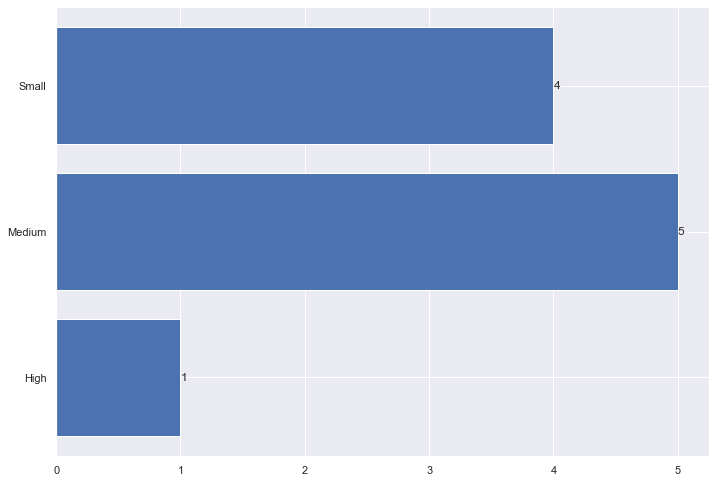

In [408]:
# Revisamos Outlet_Size final, una vez corregido
df_size = df
df_size['Outlet_Size'].fillna('No Info',inplace=True)
df_size = df.groupby('Outlet_Size')['Outlet_Identifier'].nunique().reset_index()
df_size


x = df_size['Outlet_Size']
y = df_size['Outlet_Identifier']

fig, ax = plt.subplots()
bars = ax.barh(x, y)

ax.bar_label(bars)